<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/CNIO_Data_Analysis_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Sección nueva

In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import f_classif as FC 
from sklearn.metrics import mutual_info_score as MIS
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import plotly.express as px
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from scipy import stats

# Para definir las rutas de origines de datos y resultados.
path = os.getcwd()
dataDir = os.path.join(path, 'data')
resultDir = os.path.join(path, 'resultados')

In [3]:
#df=pd.read_table(dataDir+"\ADUPED_Formatted_filter.csv")
#df=pd.read_csv(dataDir+"\ADUPED_Formatted_New.csv")
df = pd.read_table('/content/gdrive/MyDrive/CNIO Notebooks/data/ADUPED_Formatted_filter.csv')
#df=pd.read_csv('/content/gdrive/MyDrive/ADUPED_Formatted.csv')
dfTop50FormatedNew = pd.read_csv('/content/gdrive/MyDrive/CNIO Notebooks/data/Analisis_Top_50_4_Experimentos_Formated_filter.csv')
dfTop50FormatedNew.head()

,Index,Feature,Score,Media adultos,Media pediatricos,Abs(media adultos - media pediatricos),Experimento
0,41,1:155086187,6.790366,3.0,2.916667,0.083333,1
1,42,1:192658301,6.790366,3.0,2.916667,0.083333,1
2,43,1:227160648,6.790366,3.0,2.916667,0.083333,1
3,36,1:50655526,6.790366,3.0,2.916667,0.083333,1
4,37,1:58665639,6.790366,3.0,2.916667,0.083333,1


1. Promedio de valores NA para todas las columnas. Un 
único valor que resuma, de media, cuantos valores NA hay en la tabla (en total y diferenciado para adultos y menores) -Descartar análisis
2. Top 10 de columnas con más valores de NA (en total y diferenciado para adultos y menores)

3. Cuantas columnas hay con 0 valores de NA (en total y diferenciado para adultos y menores)

4. Exactamente lo mismo de antes, pero para ver la distribución de valores 0, 1 y 2

4. Número de columnas que tienen exactamente el mismo valor para los 140 sujetos

5. Número de columnas que tienen exactamente el mismo valor para todos los adultos

6. Número de columnas que tienen exactamente el mismo valor para todos los menores

## Top 10 de Columnas con mas valores NaN

Aquí obtenemos el top 10 de columnas con una mayor cantidad de campos vacíos. Podemos observar que los primeros 10 registros tienen 21 muestras vacías.

In [4]:
# Validamos la ultima columna
count = df.iloc[:, -1].isna().sum()

if count == 140:
    df = df.iloc[:,:-1]
display(df.head())

,Sample,Category,1:873481,1:873548,1:874248,1:925875,1:925881,1:935677,1:935835,1:943364,...,22:50744019,22:50754880,22:50755017,22:50755144,22:50768762,22:50769542,22:50775887,22:50777900,22:50777958,22:50799068
0,00S150,PEDIATRIC,0,1,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,03S66,PEDIATRIC,0,1,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,03S684,PEDIATRIC,0,2,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,05S1007,ADULT,0,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,07S592,ADULT,0,1,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [5]:
df1 = df.isna().sum()
df1= df1[df1 != 0].sort_values(ascending=False).head(n=10)
df1

19:35857176     7
1:190264820     7
7:15418561      7
7:16600965      7
11:197557       7
7:16609787      7
7:16696826      7
10:133285043    7
19:13954344     7
1:192716232     7
dtype: int64

## Top 10 de Columnas con mas valores NaN Muestras Menores

Aquí obtenemos el top 10 de columnas con una mayor cantidad de campos vacíos para el grupo de muestras de pacientes pediatricos. Podemos observar que los primeros 10 registros tienen entre 13 y 12 muestras vacías.

In [6]:
dfMenores = df[df['Category']=='PEDIATRIC'] 
dfMenores = dfMenores.isna().sum()
dfMenores = dfMenores[dfMenores != 0].sort_values(ascending=False).head(n=10)
print(dfMenores)

3:117027446    6
19:53741260    6
9:64408021     6
3:52378822     6
8:97815323     6
10:49988965    6
13:77589108    6
7:128839919    6
15:65391838    5
8:36931175     5
dtype: int64


## Top 10 de Columnas con mas valores NaN Muestras Adultos

Aquí obtenemos el top 10 de columnas con una mayor cantidad de campos vacíos para el grupo de muestras de pacientes adultos. Podemos observar que los primeros 10 registros tienen 21 muestras vacías.

In [7]:
dfAdultos = df[df['Category']=='ADULT'] 
dfAdultos = dfAdultos.isna().sum()
dfAdultos = dfAdultos[dfAdultos != 0].sort_values(ascending=False).head(n=10)
print(dfAdultos)

6:155240520    7
11:5544821     7
1:58782413     7
15:73704249    7
11:5269884     7
2:97029299     7
2:97185332     7
2:97202237     7
2:98133992     7
3:190623302    7
dtype: int64



## Cuantas columnas hay con 0 valores de NA (en total y diferenciado para pacientes adultos y pediátricos)?

En el siguiente apartado queremos encontrar el número de columnas que no contienen ningún vacío (NaN) **para todas las muestras**. Se han obtenido un total de **116,017.00** muestras que no contienen valores vacíos.

In [8]:
df1 = df.count()
df1 = df1[df1 == 140]
index = df1.index
numberOfRowsWithout = len(index)
print('Número de Columnas sin valores NaN: '+str(numberOfRowsWithout))

Número de Columnas sin valores NaN: 68887



## Cuantas columnas hay con 0 valores de NA para pacientes pediátricos?

En el siguiente apartado queremos encontrar el número de columnas que no contienen ningún vacío (NaN) **para las muestras de pacientes pediatricos**. Se han obtenido un total de **152,502.00** muestras que no contienen valores vacíos.

In [9]:
df1 = df[df['Category']=='PEDIATRIC'].count()
df1 = df1[df1 == 24]
index = df1.index
numberOfRowsWithout = len(index)
print('Menores | Número de Columnas sin valores NaN: '+str(numberOfRowsWithout))

Menores | Número de Columnas sin valores NaN: 86279


## Cuantas columnas hay con 0 valores de NA para pacientes adultos?

En el siguiente apartado queremos encontrar el número de columnas que no contienen ningún vacío (NaN) **para las muestras de pacientes adultos**. Se han obtenido un total de **124,587.00** muestras que no contienen valores vacíos.

In [10]:
df1 = df[df['Category']=='ADULT'].count()
df1 = df1[df1 == 116]
index = df1.index
numberOfRowsWithout = len(index)
print('Adultos | Número de Columnas sin valores NaN: '+str(numberOfRowsWithout))

Adultos | Número de Columnas sin valores NaN: 87265


## Que columnas existen con valores iguales para todos los pacientes (adultos y pediátricos)?
Aquí buscaremos todas las columnas con valores iguales para todas las muestras, tenemos un total de **71,913.00**.

In [11]:
df1 = df.copy()
duplicatedColumnsValues = df1.T.duplicated()
duplicatedColumnsValues[duplicatedColumnsValues == True]

1:1267891      True
1:1290424      True
1:1387275      True
1:1482614      True
1:1485803      True
               ... 
22:50754880    True
22:50755017    True
22:50777900    True
22:50777958    True
22:50799068    True
Length: 49504, dtype: bool

## Que columnas existen con valores iguales para los pacientes adultos?

Aquí buscaremos todas las columnas con valores iguales para las muestras de pacientes adultos, tenemos un total de **80,680.00**.


In [12]:
dfAdultos = (df[df['Category']=='ADULT']).copy()
duplicatedColumnsAdultos = dfAdultos.T.duplicated()
duplicatedColumnsAdultos[duplicatedColumnsAdultos == True]

1:962369       True
1:1267891      True
1:1290424      True
1:1295449      True
1:1312911      True
               ... 
22:50755017    True
22:50769542    True
22:50777900    True
22:50777958    True
22:50799068    True
Length: 56936, dtype: bool

## Que columnas existen con valores iguales para los pacientes pediátricos?

Aquí buscaremos todas las columnas con valores iguales para las muestras de pacientes pediátricos, tenemos un total de **152,814.00**.

Podemos observar que en el caso de los pacientes pediátricos tienen más columnas con valores repetidos comparados con los pacientes adultos.


In [13]:
dfMenores = (df[df['Category']=='PEDIATRIC']).copy() 
duplicatedColumnsMenores = dfMenores.T.duplicated()
duplicatedColumnsMenores[duplicatedColumnsMenores == True]

1:874248       True
1:925875       True
1:935835       True
1:943896       True
1:943961       True
               ... 
22:50769542    True
22:50775887    True
22:50777900    True
22:50777958    True
22:50799068    True
Length: 99408, dtype: bool

# Promedio de todas las columnas

Hemos calculado el promedio de las columnas de las **140** muestras y lo almacenamos en el fichero *Describe_CNIO.csv*

In [14]:
df1 = df.copy()
dfMeanAllColumns = df1.mean()
dfMeanAllColumns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


1:873481       0.007143
1:873548       0.714286
1:874248       0.007194
1:925875       0.007353
1:925881       0.007246
                 ...   
22:50769542    0.007194
22:50775887    0.007246
22:50777900    0.007194
22:50777958    0.007143
22:50799068    0.007194
Length: 129831, dtype: float64

In [15]:
df1 = df.copy()
describeDF1 = df1.fillna(-1).describe()
describeDF1.to_csv("Describe_CNIO.csv")
describeDF1

,1:873481,1:873548,1:874248,1:925875,1:925881,1:935677,1:935835,1:943364,1:943404,1:943896,...,22:50744019,22:50754880,22:50755017,22:50755144,22:50768762,22:50769542,22:50775887,22:50777900,22:50777958,22:50799068
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.007143,0.714286,0.000000,-0.021429,-0.007143,-0.007143,0.028571,0.000000,-0.014286,0.014286,...,0.014286,0.000000,0.014286,0.071429,-0.007143,0.000000,-0.007143,0.000000,0.007143,0.000000
std,0.084515,0.670935,0.119952,0.188438,0.146736,0.146736,0.167197,0.119952,0.207268,0.119092,...,0.119092,0.119952,0.119092,0.352644,0.224295,0.119952,0.146736,0.119952,0.084515,0.119952
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df2 = df.copy()
df2 = df2.iloc[:,2:]
df2 = df2.fillna(value=-1)
df3 = df2.apply(pd.Series.value_counts)
df3 = df3.fillna(value=0)
df3
#df3.to_csv("COUNT_VALUES_BY_COLUMN.csv")

,1:873481,1:873548,1:874248,1:925875,1:925881,1:935677,1:935835,1:943364,1:943404,1:943896,...,22:50744019,22:50754880,22:50755017,22:50755144,22:50768762,22:50769542,22:50775887,22:50777900,22:50777958,22:50799068
-1.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,1.0,4.0,0.0,...,0.0,1.0,0.0,4.0,4.0,1.0,2.0,1.0,0.0,1.0
0.0,139.0,57.0,138.0,135.0,137.0,137.0,136.0,138.0,134.0,138.0,...,138.0,138.0,138.0,122.0,133.0,138.0,137.0,138.0,139.0,138.0
1.0,1.0,66.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,2.0,...,2.0,1.0,2.0,14.0,3.0,1.0,1.0,1.0,1.0,1.0
2.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Agrupamos y contamos la cantidad de datos

Contamos la cantidad de **0, 1 y 2**, también hemos realizado un cambio para tomar los valores vacíos como **-1**

In [17]:
df3.T.describe().to_csv("DESCRIBE_ALL_GROUP.csv")
df3.T.to_csv("RESUME_ALL_GROUP.csv")
df3.T

,-1.0,0.0,1.0,2.0
1:873481,0.0,139.0,1.0,0.0
1:873548,0.0,57.0,66.0,17.0
1:874248,1.0,138.0,1.0,0.0
1:925875,4.0,135.0,1.0,0.0
1:925881,2.0,137.0,1.0,0.0
...,...,...,...,...
22:50769542,1.0,138.0,1.0,0.0
22:50775887,2.0,137.0,1.0,0.0
22:50777900,1.0,138.0,1.0,0.0
22:50777958,0.0,139.0,1.0,0.0


# Agrupamos y contamos la cantidad de datos para las muestras de pacientes adultos.

Contamos la cantidad de **0, 1 y 2**, también hemos realizado un cambio para tomar los valores vacíos como **-1**

In [18]:
dfAdultos = (df[df['Category']=='ADULT']).copy().iloc[:,2:] # obtenemos todas las columnas a partir del indice 2(tercer columan en adelante)
dfAdultos = dfAdultos.fillna(value=-1)
dfAdultos = dfAdultos.apply(pd.Series.value_counts)
dfAdultos = dfAdultos.fillna(value=0)
dfAdultos

,1:873481,1:873548,1:874248,1:925875,1:925881,1:935677,1:935835,1:943364,1:943404,1:943896,...,22:50744019,22:50754880,22:50755017,22:50755144,22:50768762,22:50769542,22:50775887,22:50777900,22:50777958,22:50799068
-1.0,0.0,0.0,1.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,4.0,1.0,2.0,1.0,0.0,1.0
0.0,115.0,48.0,114.0,111.0,114.0,115.0,112.0,115.0,113.0,114.0,...,114.0,115.0,114.0,101.0,110.0,115.0,113.0,114.0,115.0,114.0
1.0,1.0,52.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,2.0,...,2.0,1.0,2.0,13.0,2.0,0.0,1.0,1.0,1.0,1.0
2.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
dfAdultos.T.describe().to_csv("DESCRIBE_ADULTS.csv")
dfAdultos.T.to_csv("RESUME_ADULTS.csv")
dfAdultos.T

,-1.0,0.0,1.0,2.0
1:873481,0.0,115.0,1.0,0.0
1:873548,0.0,48.0,52.0,16.0
1:874248,1.0,114.0,1.0,0.0
1:925875,4.0,111.0,1.0,0.0
1:925881,2.0,114.0,0.0,0.0
...,...,...,...,...
22:50769542,1.0,115.0,0.0,0.0
22:50775887,2.0,113.0,1.0,0.0
22:50777900,1.0,114.0,1.0,0.0
22:50777958,0.0,115.0,1.0,0.0


# Agrupamos y contamos la cantidad de datos para las muestras de pacientes pediátricos.

Contamos la cantidad de **0, 1 y 2**, también hemos realizado un cambio para tomar los valores vacíos como **-1**

In [20]:
dfMenores = (df[df['Category']=='PEDIATRIC']).copy().iloc[:,2:]
dfMenores = dfMenores.fillna(value=-1)
dfMenores = dfMenores.apply(pd.Series.value_counts)
dfMenores = dfMenores.fillna(value=0)
dfMenores

,1:873481,1:873548,1:874248,1:925875,1:925881,1:935677,1:935835,1:943364,1:943404,1:943896,...,22:50744019,22:50754880,22:50755017,22:50755144,22:50768762,22:50769542,22:50775887,22:50777900,22:50777958,22:50799068
-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,24.0,9.0,24.0,24.0,23.0,22.0,24.0,23.0,21.0,24.0,...,24.0,23.0,24.0,21.0,23.0,23.0,24.0,24.0,24.0,24.0
1.0,0.0,14.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
dfMenores.T.describe().to_csv("DESCRIBE_PEDIATRICS.csv")
dfMenores.T.to_csv("RESUME_PEDIATRICS.csv")
dfMenores.T

,-1.0,0.0,1.0,2.0
1:873481,0.0,24.0,0.0,0.0
1:873548,0.0,9.0,14.0,1.0
1:874248,0.0,24.0,0.0,0.0
1:925875,0.0,24.0,0.0,0.0
1:925881,0.0,23.0,1.0,0.0
...,...,...,...,...
22:50769542,0.0,23.0,1.0,0.0
22:50775887,0.0,24.0,0.0,0.0
22:50777900,0.0,24.0,0.0,0.0
22:50777958,0.0,24.0,0.0,0.0


# A continuación procedemos a realizar dos experimentos y es que queremos ver cual es el comportamiento de los datos si:


Contamos la cantidad de **0, 1 y 2**, también hemos realizado un cambio para tomar los valores vacíos como **-1**

**Gráficos de Barras**

Obtenemos un resumen de las 140 muestras previo a los cambios que realizaremos.

In [22]:
df2
df2.T.describe().to_csv("DESCRIBE_ALL_GROUP_BY_ROW.csv")
df2.T.to_csv("RESUME_ALL_GROUP_BY_ROW.csv")
df2.T

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
1:873481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1:873548,1.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0
1:874248,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1:925875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1:925881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:50769542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22:50775887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22:50777900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
22:50777958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Haremos el experimento de sustituir los valores
0 --> 1,2, lo que sea 1 o 2 cambiarlo por 3

In [23]:
df0 = df.copy()
df0 = df0.iloc[:,2:] # Quitamos el nombre de la muestra
df0 = df0.fillna(value=-1) # Llenamos los campos vacíos
df0 = df0.replace(1,3) #(old_value,new_value)
df0 = df0.replace(2,3) #(old_value,new_value)
df0Result = df0.T.apply(pd.Series.value_counts).T
df0Result = df0Result / 129831
df0Result['Category'] = df.copy().iloc[:,1:2]
#df0Result

## Haremos el experimento de sustituir los valores
0,1 --> 2, lo que sea 1 o 2 cambiarlo por 3 

Text(0.5, 1.0, 'Distribución de grupos de alelos 3.0 y 0.0')

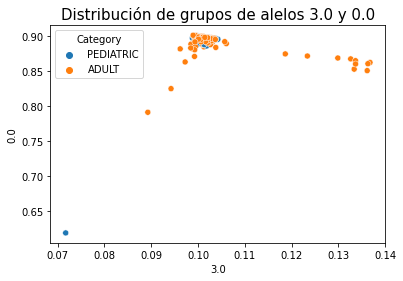

In [24]:
df0Result.columns
image = sns.scatterplot(data=df0Result ,x=df0Result[3.0],
                    y=df0Result[0.0],
                    sizes = (10, 5),
                    hue="Category")
image.axes.set_title("Distribución de grupos de alelos 3.0 y 0.0",fontsize = 15)



Text(0.5, 1.0, 'Distribución de grupos de alelos 3.0 y -1.0')

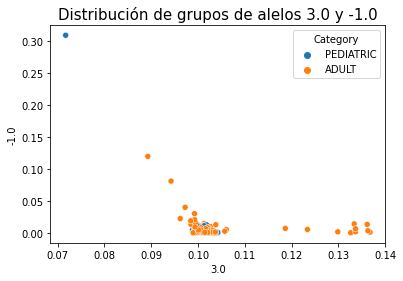

In [25]:
df0Result.columns
image = sns.scatterplot(data=df0Result ,x=df0Result[3.0],
                    y=df0Result[-1.0],
                    sizes = (10, 5),
                    hue="Category")
image.axes.set_title("Distribución de grupos de alelos 3.0 y -1.0",fontsize = 15)


Text(0.5, 1.0, 'Distribución de grupos de alelos 0.0 y -1.0')

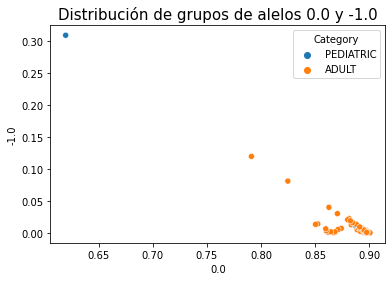

In [26]:
df0Result.columns
image = sns.scatterplot(data=df0Result ,x=df0Result[0.0],
                    y=df0Result[-1.0],
                    sizes = (10, 5),
                    hue="Category")
image.axes.set_title("Distribución de grupos de alelos 0.0 y -1.0",fontsize = 15)


## Haremos el experimento de sustituir los valores
0,1 --> 2, lo que sea 0 o 1 cambiarlo por 3 

In [27]:
df3 = df.copy()
df3 = df3.iloc[:,2:] # Quitamos el nombre de la muestra
df3 = df3.fillna(value=-1) # Llenamos los campos vacíos
df3 = df3.replace(0,3) #(old_value,new_value)
df3 = df3.replace(1,3) #(old_value,new_value)
df3Result = df3.T.apply(pd.Series.value_counts).T
df3Result = df3Result / 129831
df3Result['Category'] = df.copy().iloc[:,1:2]
#df3Result

Text(0.5, 1.0, 'Distribución de grupos de alelos 2.0 y 3.0')

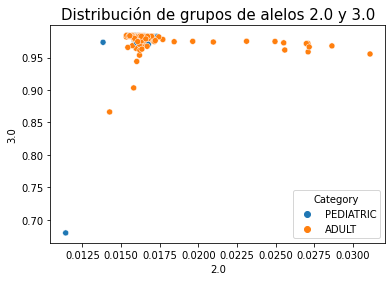

In [28]:
df0Result.columns
image = sns.scatterplot(data=df3Result ,x = df3Result[2.0],
                    y = df3Result[3.0],
                    sizes = (10, 5),
                    hue="Category")
image.axes.set_title("Distribución de grupos de alelos 2.0 y 3.0",fontsize = 15)



Text(0.5, 1.0, 'Distribución de grupos de alelos 2 y -1')

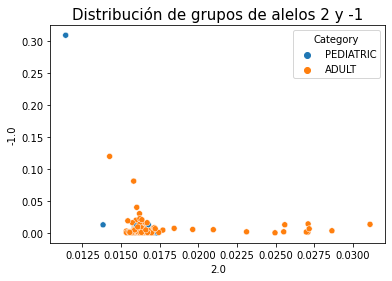

In [29]:
df0Result.columns
image = sns.scatterplot(data=df3Result ,x = df3Result[2.0],
                    y = df3Result[-1.0],
                    sizes = (10, 5),
                    hue="Category")
image.axes.set_title("Distribución de grupos de alelos 2 y -1",fontsize = 15)



Text(0.5, 1.0, 'Distribución de grupos de alelos 3.0 y -1.0')

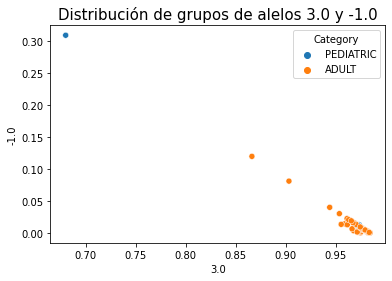

In [30]:
df0Result.columns
image = sns.scatterplot(data=df3Result ,x = df3Result[3.0],
                    y = df3Result[-1.0],
                    sizes = (10, 5),
                    hue="Category")
image.axes.set_title("Distribución de grupos de alelos 3.0 y -1.0",fontsize = 15)



# Feature selection experimento 1

In [31]:
# Partiendo del DataFrame original, cambiamos "0" y "1" por "3"
# Quitamos la columna "Sample"

df3 = df.copy()
df3.replace(0, 3, inplace=True)
df3.replace(1, 3, inplace=True)
df3.drop('Sample', axis=1, inplace=True)

In [32]:
# Separamos las características ("X") de la clase a predecir ("y")

X1 = df3.drop('Category', axis=1)
y1 = df3['Category']

In [33]:
# No se puede hacer selección de características si hay valores nulos
# Imputamos el valor más frecuente (sustituimos los NAN por el valor más frecuente de la columna)

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_imp_exp1 = pd.DataFrame(imp.fit_transform(X1))
X_imp_exp1_cp = X_imp_exp1.copy() # se cre una copia de la imputación de los valores para poder aplicar MI y verificar el score de los modelos
X_imp_exp1.columns = X1.columns
X_imp_exp1_cp.columns = X1.columns

In [34]:
# Eliminamos todas las columnas que tengan un único valor distinto
# La comprobación "len(count) == 2" no haría falta realmente si tenemos solo dos clases,
# pero así nos sirve también para la versión "no agrupada" de los datos

list_columns = []
for column in X_imp_exp1.columns:
  count = X_imp_exp1[column].value_counts()
  if len(count) == 2 and not count[count.isin([1])].empty:  # Solo dos valores diferentes y uno de ellos tiene frecuencia "1"
    list_columns.append(column)

X_imp_exp1.drop(list_columns, inplace=True, axis=1)  # Eliminar todas las columnas identificadas

In [35]:
X_imp_exp1.shape

(140, 122451)

In [36]:
# Calcular Chi2 para cada columna y nos quedamos con los "k" mejores
# La función "chi2" devuelve dos arrays: uno con Chi2 y otro con p-values
# "Feature" indica el nombre de la columna y "Score" su importancia según Chi2

k = 20
chi_score = chi2(X_imp_exp1, y1)[0]  # Nos quedamos con el array de Chi2
df_score = pd.DataFrame(chi_score)
df_columns = pd.DataFrame(X_imp_exp1.columns)
df_chi2 = pd.concat([df_columns, df_score], axis=1)
df_chi2.columns = ['Feature', 'Score']
df_chi2.nlargest(k, 'Score').to_csv("Snips_Experimento_1_Chi2.csv")
df_chi2.nlargest(k, 'Score')

,Feature,Score
75884,12:13563704,1.032738
21655,2:233852579,0.769996
50468,7:108571909,0.690374
32428,4:99126778,0.615871
76409,12:29333812,0.588278
69102,11:20090946,0.585069
117036,20:48632651,0.581987
22117,2:241456672,0.579027
76407,12:29332516,0.579027
66568,10:114833416,0.551739


# Feature selection experimento 2

In [37]:
# Partiendo del DataFrame original, cambiamos "1" y "2" por "3"
# Quitamos la columna "Sample"

df0 = df.copy()
df0.replace(1, 3, inplace=True)
df0.replace(2, 3, inplace=True)
df0.drop('Sample', axis=1, inplace=True)

In [38]:
# Separamos las características ("X") de la clase a predecir ("y")

X2 = df0.drop('Category', axis=1)
y2 = df0['Category']

In [39]:
# No se puede hacer selección de características si hay valores nulos
# Imputamos el valor más frecuente (sustituimos los NAN por el valor más frecuente de la columna)

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_imp_exp2 = pd.DataFrame(imp.fit_transform(X2))
X_imp_exp2_cp = X_imp_exp2.copy() # se cre una copia de la imputación de los valores para poder aplicar MI y verificar el score de los modelos
X_imp_exp2.columns = X2.columns
X_imp_exp2_cp.columns = X2.columns

In [40]:
# Eliminamos todas las columnas que tengan un único valor distinto
# La comprobación "len(count) == 2" no haría falta realmente si tenemos solo dos clases,
# pero así nos sirve también para la versión "no agrupada" de los datos

list_columns = []
for column in X_imp_exp2.columns:
  count = X_imp_exp2[column].value_counts()
  if len(count) == 2 and not count[count.isin([1])].empty:  # Solo dos valores diferentes y uno de ellos tiene frecuencia "1"
    list_columns.append(column)

X_imp_exp2.drop(list_columns, inplace=True, axis=1)  # Eliminar todas las columnas identificadas

In [41]:
X_imp_exp2.shape

(140, 71973)

por aquí va

In [42]:
# Calcular Chi2 para cada columna y nos quedamos con los "k" mejores
# La función "chi2" devuelve dos arrays: uno con Chi2 y otro con p-values
# "Feature" indica el nombre de la columna y "Score" su importancia según Chi2

k = 20
chi_score = chi2(X_imp_exp2, y2)[0]  # Nos quedamos con el array de Chi2
df_score = pd.DataFrame(chi_score)
df_columns = pd.DataFrame(X_imp_exp2.columns)
df_chi2 = pd.concat([df_columns, df_score], axis=1)
df_chi2.columns = ['Feature', 'Score']
df_chi2.nlargest(k, 'Score').to_csv("Snips_Experimento_2_Chi2.csv")
df_chi2.nlargest(k, 'Score')

,Feature,Score
24945,6:51830843,65.715517
18291,4:73576632,59.008621
45413,12:50090230,58.189655
28330,7:55173110,58.000000
59908,17:66877413,58.000000
38899,10:104450222,55.520115
38878,10:104203795,46.013185
10904,2:173363768,43.568966
1175,1:21704391,43.500000
1603,1:31059179,43.500000


# Feature selection usando Mutual Information Method con el experimento 1

In [43]:
# Partiendo del DataFrame original, cambiamos "0" y "1" por "3"
# Quitamos la columna "Sample"

mi_score_exp1 = MIC(X_imp_exp1,y1)
mi_score_exp2 = MIC(X_imp_exp2,y2)
print(mi_score_exp1)
print(mi_score_exp2)

[0.00048749 0.04443671 0.01553223 ... 0.0352287  0.         0.04790788]
[0.         0.         0.         ... 0.02538921 0.07882014 0.        ]


In [44]:
# Revisamos para ambos experimentos cuales son los score y el número de atributos seleccionados 
# mediante Mutual Information

print(mi_score_exp1.shape)
print(mi_score_exp2.shape)


(122451,)
(71973,)


In [45]:
# Haremos la preparación de un conjunto de entrenamiento y un conjunto de prueba
# para cada experimento.
# Para el primer experimento extraemos un muestra X_train_1 para el entrenamiento 
# y una muestra X_test_1 para la prueba, con todos los snips. 

X_train_1, X_test_1, y_train, y_test = tts(
    X_imp_exp1_cp, y1
    ,random_state=0
    ,stratify=y1
)


In [46]:
mi_score_selected_index = np.where(mi_score_exp1 >= 0.1)[0]

X_2 = X_imp_exp1_cp.iloc[:,mi_score_selected_index]

X_train_2,X_test_2,y_train,y_test = tts(
    X_2,y1
    ,random_state=0
    ,stratify=y1
)
X_imp_exp1.iloc[:,mi_score_selected_index].to_csv("Snips_Experimento_1_MI.csv")
print(X_imp_exp1.iloc[:,mi_score_selected_index])

     1:10008254  1:11668837  1:21875971  1:36341880  1:46813532  1:58665639  \
0           3.0         3.0         3.0         3.0         3.0         3.0   
1           3.0         3.0         3.0         3.0         3.0         3.0   
2           3.0         3.0         3.0         3.0         3.0         3.0   
3           3.0         3.0         3.0         3.0         3.0         3.0   
4           3.0         3.0         3.0         3.0         3.0         3.0   
..          ...         ...         ...         ...         ...         ...   
135         3.0         3.0         3.0         3.0         3.0         3.0   
136         3.0         3.0         3.0         3.0         3.0         3.0   
137         3.0         3.0         3.0         3.0         3.0         3.0   
138         3.0         3.0         3.0         2.0         3.0         3.0   
139         3.0         3.0         3.0         3.0         3.0         3.0   

     1:75160929  1:109265087  1:109489026  1:149926

In [47]:
mi_score_selected_index = np.where(mi_score_exp1 < 0.1)[0]
X_3 = X_imp_exp1_cp.iloc[:,mi_score_selected_index]
X_train_3,X_test_3,y_train,y_test = tts(
    X_3,y1
    ,random_state=0
    ,stratify=y1
)

print(X_3.shape)

(140, 122170)


In [48]:
model_1 = DTC().fit(X_train_1,y_train)
model_2 = DTC().fit(X_train_2,y_train)
model_3 = DTC().fit(X_train_3,y_train)
score_1 = model_1.score(X_test_1,y_test)
score_2 = model_2.score(X_test_2,y_test)
score_3 = model_3.score(X_test_3,y_test)
print(f"score_1:{score_1}\nscore_2:{score_2}\nscore_3:{score_3}")

score_1:0.6285714285714286
score_2:0.6857142857142857
score_3:0.4857142857142857


In [49]:
print(X_train_1.shape, ", este es el tamaño si usamos todos los snips disponibles para entrenar un arbol de decisión.")
print(X_train_2.shape, ", este es el tamaño si usamos los snips que tienen un score > 0.1 para entrenar un arbol de decisión.")
print(X_train_3.shape, ", este es el tamaño si usamos los snips que tienen un score < 0.1 para entrenar un arbol de decisión.")

(105, 129831) , este es el tamaño si usamos todos los snips disponibles para entrenar un arbol de decisión.
(105, 281) , este es el tamaño si usamos los snips que tienen un score > 0.1 para entrenar un arbol de decisión.
(105, 122170) , este es el tamaño si usamos los snips que tienen un score < 0.1 para entrenar un arbol de decisión.


In [50]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train_2, y_train).predict(X_test_2)
print("Número de valores mal predichos %d puntos : %d"% (X_test_2.shape[0], (y_test != y_pred).sum()))
print('Score de predicción ',gnb.score(X_test_2, y_test))

Número de valores mal predichos 35 puntos : 18
Score de predicción  0.4857142857142857


# Utilizaremos KNN para verificar con los snips obtenidos si son capaces de predecir el modelo y verificaremos con que porcentaje para el experimento 1.

In [51]:
# Create KNN classifier
knn = knc(n_neighbors = 3)
# Ajustamos el clasificador a los datos obtenidos por MI con score mayor a 0.1
knn.fit(X_train_2,y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
knn.predict(X_test_2)

array(['ADULT', 'PEDIATRIC', 'PEDIATRIC', 'ADULT', 'ADULT', 'ADULT',
       'PEDIATRIC', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT',
       'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT',
       'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT',
       'ADULT', 'PEDIATRIC', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT',
       'ADULT'], dtype=object)

Calculamos el score de nuestro modelo, podemos observar que es algo bajo con solo 74%.

Aplicaremos cross validation para mejorar ese score de predicción.

In [53]:
knn.score(X_test_2, y_test)

0.7142857142857143

A partir de aquí aplicaremos cross validation, esperamos que haya una mejora en la predicción utilizando knn.

In [54]:
# Creamos el nuevo modelo KNN
knn_cv = knc(n_neighbors=3)

In [55]:
cv_scores = cross_val_score(knn_cv, X_2, y2, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.82142857 0.67857143 0.71428571 0.75       0.64285714]
cv_scores mean:0.7214285714285714


Tuvimos una mejora de un 1% en la predicción aplicando cross validation para el experimento 1 con los parámetros cuyo score es > 0.1.

# Feature selection usando Mutual Information Method con el experimento 2

In [56]:
# Haremos la preparación de un conjunto de entrenamiento y un conjunto de prueba
# para cada experimento.
# Para el segundo experimento extraemos un muestra X_train_1 para el entrenamiento 
# y una muestra X_test_1 para la prueba con todos los snips

X_train_1,X_test_1,y_train,y_test = tts(
    X_imp_exp2_cp, y2
    ,random_state=0
    ,stratify=y2
)

In [57]:


# Extraemos un muestra X_train_2 para el entrenamiento y una muestra X_test_2 
# para la prueba con los snips que previamente tienen un score > a 0.1, para esto
# tenémos un total de 444 snips.

mi_score_selected_index = np.where(mi_score_exp2 > 0.1)[0]

X_2 = X_imp_exp2_cp.iloc[:,mi_score_selected_index]

X_train_2,X_test_2,y_train,y_test = tts(
    X_2,y2
    ,random_state=0
    ,stratify=y2
)
#X_2.to_csv("Snips_Experimento_2_MI.csv")
X_imp_exp2.iloc[:,mi_score_selected_index].to_csv("Snips_Experimento_2_MI.csv")
print(X_2.shape)

(140, 176)


In [58]:
mi_score_selected_index = np.where(mi_score_exp2 < 0.1)[0]
X_3 = X_imp_exp2_cp.iloc[:,mi_score_selected_index]
X_train_3,X_test_3,y_train,y_test = tts(
    X_3,y2
    ,random_state=0
    ,stratify=y2
)

In [59]:

model_1 = DTC().fit(X_train_1, y_train)
model_2 = DTC().fit(X_train_2, y_train)
model_3 = DTC().fit(X_train_3, y_train)
score_1 = model_1.score(X_test_1, y_test)
score_2 = model_2.score(X_test_2, y_test)
score_3 = model_3.score(X_test_3, y_test)
print(f"score_1:{score_1}\nscore_2:{score_2}\nscore_3:{score_3}")

score_1:0.8
score_2:0.6857142857142857
score_3:0.8285714285714286


In [60]:

print(X_train_1.shape, ", este es el tamaño si usamos todos los snips disponibles para entrenar un arbol de decisión.")
print(X_train_2.shape, ", este es el tamaño si usamos los snips que tienen un score > 0.1 para entrenar un arbol de decisión.")
print(X_train_3.shape, ", este es el tamaño si usamos los snips que tienen un score < 0.1 para entrenar un arbol de decisión.")

(105, 129831) , este es el tamaño si usamos todos los snips disponibles para entrenar un arbol de decisión.
(105, 176) , este es el tamaño si usamos los snips que tienen un score > 0.1 para entrenar un arbol de decisión.
(105, 71797) , este es el tamaño si usamos los snips que tienen un score < 0.1 para entrenar un arbol de decisión.


# Utilizaremos KNN para verificar con los snips obtenidos si son capaces de predecir el modelo y verificaremos con que porcentaje para el experimento 2.

In [61]:
# Create KNN classifier
knn = knc(n_neighbors = 3)
# Ajustamos el clasificador a los datos obtenidos por MI con score mayor a 0.1
knn.fit(X_train_2,y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
knn.predict(X_test_2)

array(['ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT',
       'PEDIATRIC', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'PEDIATRIC',
       'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT',
       'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT',
       'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT', 'ADULT',
       'ADULT'], dtype=object)

Calculamos el score de nuestro modelo, podemos observar que es algo bajo con solo 62%.

Aplicaremos cross validation para mejorar ese score de predicción.

In [63]:
knn.score(X_test_2, y_test)

0.7714285714285715

A partir de aquí aplicaremos cross validation, esperamos que haya una mejora en la predicción utilizando knn.

In [64]:
# Creamos el nuevo modelo KNN
knn_cv = knc(n_neighbors=3)

In [65]:
cv_scores = cross_val_score(knn_cv, X_2, y2, cv=24)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.66666667 0.66666667 0.66666667 0.83333333 0.83333333 0.83333333
 0.83333333 0.66666667 0.83333333 0.83333333 0.83333333 0.66666667
 0.83333333 0.83333333 0.83333333 0.83333333 0.66666667 0.5
 0.66666667 0.83333333 1.         0.8        0.6        0.6       ]
cv_scores mean:0.7569444444444443


In [66]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train_2, y_train).predict(X_test_2)
print("Número de valores mal predichos %d puntos : %d"% (X_test_2.shape[0], (y_test != y_pred).sum()))
print('Score de predicción ',gnb.score(X_test_2, y_test))

Número de valores mal predichos 35 puntos : 19
Score de predicción  0.45714285714285713


# Clasificador F para obtener los p-valores

In [67]:
# Para este experimento quitamos las columnas que tienen todos sus valores repetidos.
# Eliminamos todas las columnas que tengan un único valor distinto
# La comprobación "len(count) == 1" es par asaber si solo hay valores de una clase

list_columns = []
for column in X_imp_exp1.columns:
  count = X_imp_exp1[column].value_counts()
  #print(len(count))
  #print(count,'\n')  
  if len(count) == 1:  # Identificamos las columnas que solo tienen un valor
    #print(len(count))
    list_columns.append(column)


X_imp_exp1.drop(list_columns, inplace=True, axis=1)  # Eliminar todas las columnas identificadas

# Para este experimento quitamos las columnas que tienen todos sus valores repetidos.
# Eliminamos todas las columnas que tengan un único valor distinto
# La comprobación "len(count) == 1" es par asaber si solo hay valores de una clase

list_columns = []
for column in X_imp_exp2.columns:
  count = X_imp_exp2[column].value_counts()
  #print(len(count))
  #print(count,'\n')  
  if len(count) == 1:  # Identificamos las columnas que solo tienen un valor
    #print(len(count))
    list_columns.append(column)

X_imp_exp2.drop(list_columns, inplace=True, axis=1)  # Eliminar todas las columnas identificadas


In [68]:
F1, pval1 = FC(X_imp_exp1, y1)
print(X_imp_exp1.shape)
print(F1)
print(len(pval1 <= 0.05))

(140, 24260)
[1.72391991e+00 1.17890780e-03 6.28065740e-01 ... 1.01112619e+00
 3.41372913e-03 3.70918510e-01]
24260


In [69]:
F2, pval2 = FC(X_imp_exp2, y1)
print(X_imp_exp2.shape)
print(F2.shape)
print(len(pval2 <= 0.05))

(140, 71973)
(71973,)
71973


In [70]:
zscoreF1 = stats.zscore(F1)
zscoreF2 = stats.zscore(F2)

#zscorePval1 = stats.zscore(pval1)
#zscorePval2 = stats.zscore(pval2)


print(zscoreF1.shape)
print(zscoreF2.shape)
#print(zscorePval1.shape)
#print(zscorePval2.shape)

(24260,)
(71973,)


In [71]:
df1_score = pd.DataFrame(zscoreF1)
df1_columns = pd.DataFrame(X_imp_exp1.columns)
df1_zscore = pd.concat([df1_columns, df1_score], axis=1)
df1_zscore.columns = ['Feature', 'Score']
df1_zscore.nlargest(50, 'Score')

,Feature,Score
4754,3:64681383,11.675518
7698,5:176571245,11.492649
10879,8:109444782,11.492649
8247,6:43771240,11.073398
11178,9:4844704,11.073398
11277,9:21440491,11.073398
20496,18:3534177,11.073398
21356,19:10357992,11.073398
23720,22:19089284,11.073398
13087,10:104214223,10.723921


In [72]:
df2_score = pd.DataFrame(zscoreF2)
df2_columns = pd.DataFrame(X_imp_exp2.columns)
df2_zscore = pd.concat([df2_columns, df2_score], axis=1)
df2_zscore.columns = ['Feature', 'Score']
df2_zscore.nlargest(50, 'Score')

,Feature,Score
24945,6:51830843,19.779587
45413,12:50090230,17.177072
18291,4:73576632,16.652409
28330,7:55173110,15.430558
59908,17:66877413,15.430558
38899,10:104450222,14.898238
10269,2:138002079,14.065959
38878,10:104203795,13.169244
39055,10:114855286,12.138129
39744,11:1938477,11.982110


In [73]:
print('---------------------------------------------------------------------------------------------------------')
_range = (zscoreF1 >= 2)
print(len(zscoreF1[_range]))
print(X_imp_exp1.loc[:,_range].shape)

X_imp_exp1_reduced_F = X_imp_exp1.loc[:,_range].copy()

print('---------------------------------------------------------------------------------------------------------')
_range = (zscoreF2 >= 2)
print(len(zscoreF2[_range]))
print(X_imp_exp2.loc[:,_range].shape)

X_imp_exp2_reduced_F = X_imp_exp2.loc[:,_range].copy()

print('---------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------
985
(140, 985)
---------------------------------------------------------------------------------------------------------
2907
(140, 2907)
---------------------------------------------------------------------------------------------------------


# Haremos el experimento 3
No se cambiarán los datos del dataset, pero, si eliminaremos columnas que tengan un solo tipo de dato, imputaremos los valores nulos.

In [74]:
df3 = df.copy()
df3.drop('Sample', axis=1, inplace=True)

In [75]:
# Separamos las características ("X") de la clase a predecir ("y")

X3 = df3.drop('Category', axis=1)
y3 = df3['Category']

In [76]:
# No se puede hacer selección de características si hay valores nulos
# Imputamos el valor más frecuente (sustituimos los NAN por el valor más frecuente de la columna)

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_imp_exp3 = pd.DataFrame(imp.fit_transform(X3))
X_imp_exp3_cp = X_imp_exp3.copy() # se cre una copia de la imputación de los valores para poder aplicar MI y verificar el score de los modelos
X_imp_exp3.columns = X3.columns
X_imp_exp3_cp.columns = X3.columns

In [77]:
# Eliminamos todas las columnas que tengan un único valor distinto
# La comprobación "len(count) == 2" no haría falta realmente si tenemos solo dos clases,
# pero así nos sirve también para la versión "no agrupada" de los datos

list_columns = []
for column in X_imp_exp3.columns:
  count = X_imp_exp3[column].value_counts()
  #print(len(count))
  #print(count,'\n') len(count) == 1 and not count[count.isin([1])].empty:
  if len(count) >= 1 and not count[count.isin([1])].empty:  # Solo dos valores diferentes y uno de ellos tiene frecuencia "1"
    #print(count,'\n')
    list_columns.append(column)

X_imp_exp3_cp.drop(list_columns, inplace=True, axis=1)  # Eliminar todas las columnas identificadas

In [78]:
X_imp_exp3_cp.shape #64969

(140, 64969)

In [79]:
F3, pval3 = FC(X_imp_exp3_cp, y3)
print(X_imp_exp3_cp.shape)
print(F3)
print(pval3 <= 0.05)

(140, 64969)
[0.1450113  0.84489796 0.41503759 ... 0.41503759 1.08801287 0.55994384]
[False False False ... False False False]


In [80]:
zscoreF3 = stats.zscore(F3)

print(zscoreF3.shape)

(64969,)


In [81]:
df3_score = pd.DataFrame(zscoreF3)
df3_columns = pd.DataFrame(X_imp_exp3_cp.columns)
df3_zscore = pd.concat([df3_columns, df3_score], axis=1)
df3_zscore.columns = ['Feature', 'Score']
df3_zscore.nlargest(50, 'Score')['Feature'].tolist()


['12:50090230',
 '7:55173110',
 '17:66877413',
 '10:104450222',
 '10:104203795',
 '17:42162195',
 '19:901955',
 '1:157515714',
 '2:173363768',
 '1:21704391',
 '1:31059179',
 '1:152351526',
 '1:196949611',
 '2:200941313',
 '2:206765239',
 '3:48688737',
 '4:6302406',
 '7:27156497',
 '9:21367352',
 '9:135818051',
 '15:57063693',
 '17:61926459',
 '20:38239704',
 '20:61873882',
 '1:113114611',
 '1:161766419',
 '11:65356283',
 '12:558560',
 '13:102862109',
 '10:114833416',
 '1:204465310',
 '5:133225776',
 '4:38774173',
 '14:104772483',
 '10:114855286',
 '12:13563704',
 '6:36073654',
 '19:35513269',
 '7:130322574',
 '2:44280956',
 '3:58640086',
 '13:23411252',
 '2:12023994',
 '5:96986656',
 '11:18173397',
 '18:69864406',
 '18:3534177',
 '7:132130461',
 '12:29332516',
 '3:194666524']

In [82]:
print('---------------------------------------------------------------------------------------------------------')
_range = (zscoreF3 >= 2)
print(len(zscoreF3[_range]))
print(X_imp_exp3_cp.loc[:,_range].shape)

X_imp_exp3_reduced_F = X_imp_exp3_cp.loc[:,_range].copy()

print('---------------------------------------------------------------------------------------------------------')

X_imp_exp3_reduced_F

---------------------------------------------------------------------------------------------------------
2620
(140, 2620)
---------------------------------------------------------------------------------------------------------


,1:957189,1:959139,1:1085966,1:1298561,1:1482624,1:1646745,1:1968747,1:1985451,1:2400952,1:3425564,...,22:44093988,22:44569440,22:44736824,22:45199840,22:46289857,22:46721008,22:49927295,22:50153041,22:50523779,22:50576781
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
137,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
138,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0


In [83]:
#X_imp_exp1[df1_zscore.nlargest(50, 'Score')['Feature'].tolist()]
#df1_zscore.nlargest(50, 'Score')['Feature'].tolist()

In [84]:
df_Test1 = X_imp_exp1_reduced_F.copy()
df_Test2 = X_imp_exp2_reduced_F.copy()
df_Test3 = X_imp_exp3_reduced_F.copy()

df_Test1 = pd.concat((df_Test1,y3),axis=1)
df_Test2 = pd.concat((df_Test2,y3),axis=1)
df_Test3 = pd.concat((df_Test3,y3),axis=1)

#-----------------------------------------------------------------------------------
# TOP 50

df_Test_Top50_1 = X_imp_exp1[df1_zscore.nlargest(50, 'Score')['Feature'].tolist()]
df_Test_Top50_2 = X_imp_exp2[df2_zscore.nlargest(50, 'Score')['Feature'].tolist()]
df_Test_Top50_3 = X_imp_exp3[df3_zscore.nlargest(50, 'Score')['Feature'].tolist()]

df_Test_Top50_1 = pd.concat((df_Test_Top50_1,y3),axis=1)
df_Test_Top50_2 = pd.concat((df_Test_Top50_2,y3),axis=1)
df_Test_Top50_3 = pd.concat((df_Test_Top50_3,y3),axis=1)

In [85]:
e1_adult_mean = df_Test1[df_Test1['Category']=='ADULT'].mean()
e1_pediatric_mean = df_Test1[df_Test1['Category']=='PEDIATRIC'].mean()

e2_adult_mean = df_Test2[df_Test2['Category']=='ADULT'].mean()
e2_pediatric_mean = df_Test2[df_Test2['Category']=='PEDIATRIC'].mean()

e3_adult_mean = df_Test3[df_Test3['Category']=='ADULT'].mean()
e3_pediatric_mean = df_Test3[df_Test3['Category']=='PEDIATRIC'].mean()

#-----------------------------------------------------------------------------------
# TOP 50

e1_adult_mean_Top50 = df_Test_Top50_1[df_Test_Top50_1['Category']=='ADULT'].mean()
e1_pediatric_mean_Top50 = df_Test_Top50_1[df_Test_Top50_1['Category']=='PEDIATRIC'].mean()

e2_adult_mean_Top50 = df_Test_Top50_2[df_Test_Top50_2['Category']=='ADULT'].mean()
e2_pediatric_mean_Top50 = df_Test_Top50_2[df_Test_Top50_2['Category']=='PEDIATRIC'].mean()

e3_adult_mean_Top50 = df_Test_Top50_3[df_Test_Top50_3['Category']=='ADULT'].mean()
e3_pediatric_mean_Top50 = df_Test_Top50_3[df_Test_Top50_3['Category']=='PEDIATRIC'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWar

# Gráfico utilizando todas las caracteristicas del experimento 1 con zscore >= 2

Text(0, 0.5, 'Media Snips Pediátricos')

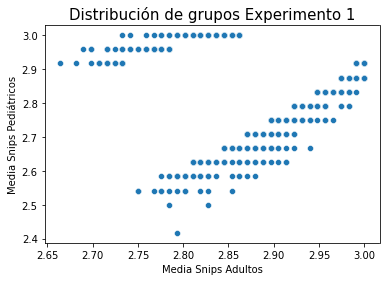

In [86]:
image = sns.scatterplot(x = e1_adult_mean,
                    y = e1_pediatric_mean,
                    sizes = (10, 5))
image.axes.set_title("Distribución de grupos Experimento 1",fontsize = 15)

plt.xlabel('Media Snips Adultos')
plt.ylabel('Media Snips Pediátricos')

# Gráfico utilizando el top 50 de caracteristicas del experimento 1 con zscore >= 2

Text(0, 0.5, 'Media Snips Pediátricos')

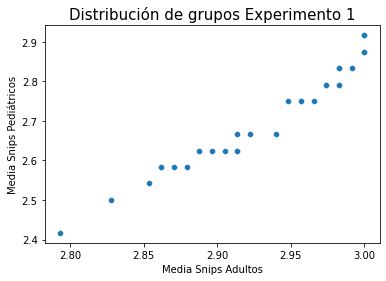

In [87]:
image = sns.scatterplot(x = e1_adult_mean_Top50,
                    y = e1_pediatric_mean_Top50,
                    sizes = (10, 5))
image.axes.set_title("Distribución de grupos Experimento 1",fontsize = 15)

plt.xlabel('Media Snips Adultos')
plt.ylabel('Media Snips Pediátricos')

# Tabla Experimento 1

In [88]:
abs_mean = abs(e1_adult_mean - e1_pediatric_mean)#abs(e1_adult_mean_Top50 - e1_pediatric_mean_Top50)#abs(df_Test_Top50_3[df_Test_Top50_3['Category']=='ADULT'].mean() - df_Test_Top50_3[df_Test_Top50_3['Category']=='PEDIATRIC'].mean()).tolist()
abs_mean = pd.Series(abs_mean)
e1_adult_mean_s = pd.Series(e1_adult_mean)#pd.Series(e1_adult_mean_Top50)
e1_pediatric_mean_s = pd.Series(e1_pediatric_mean)#pd.Series(e1_pediatric_mean_Top50)

df1_zscore_cp = df1_zscore#.nlargest(50, 'Score').copy()

df1_zscore_cp.reset_index(drop=True, inplace=True)
abs_mean.reset_index(drop=True, inplace=True)
e1_adult_mean_s.reset_index(drop=True, inplace=True)
e1_pediatric_mean_s.reset_index(drop=True, inplace=True)

df1_zscore_cp =  pd.concat([df1_zscore_cp, e1_adult_mean_s, e1_pediatric_mean_s, abs_mean], axis=1)
df1_zscore_cp.rename(columns={2: 'Abs(media adultos - media pediátricos)', 0: 'Media adultos', 1 : 'Media pediátricos'}, inplace=True)
df1_zscore_cp.sort_values(by='Abs(media adultos - media pediátricos)', axis=0, ascending=False).to_csv('df1_zscore_filter_all_features.csv')

# Gráfico utilizando todas las caracteristicas del experimento 2 con zscore >= 2

Text(0, 0.5, 'Media Snips Pediátricos')

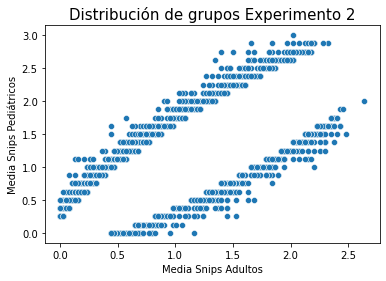

In [89]:

image = sns.scatterplot(x = e2_adult_mean,
                    y = e2_pediatric_mean,
                    sizes = (10, 5))
image.axes.set_title("Distribución de grupos Experimento 2",fontsize = 15)

plt.xlabel('Media Snips Adultos')
plt.ylabel('Media Snips Pediátricos')

# Gráfico utilizando el top 50 de caracteristicas del experimento 2 con zscore >= 2

Text(0, 0.5, 'Media Snips Pediátricos')

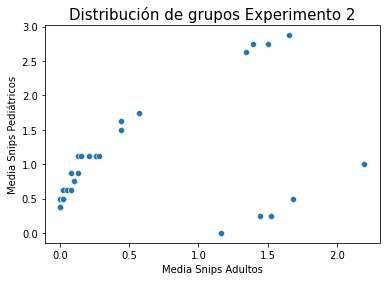

In [90]:
image = sns.scatterplot(x = e2_adult_mean_Top50,
                    y = e2_pediatric_mean_Top50,
                    sizes = (10, 5))
image.axes.set_title("Distribución de grupos Experimento 2",fontsize = 15)

plt.xlabel('Media Snips Adultos')
plt.ylabel('Media Snips Pediátricos')

# Tabla Experimento 2

In [91]:
abs_mean = abs(e2_adult_mean - e2_pediatric_mean)#abs(e2_adult_mean_Top50 - e2_pediatric_mean_Top50)#abs(df_Test_Top50_3[df_Test_Top50_3['Category']=='ADULT'].mean() - df_Test_Top50_3[df_Test_Top50_3['Category']=='PEDIATRIC'].mean()).tolist()
abs_mean = pd.Series(abs_mean)
e2_adult_mean_s = pd.Series(e2_adult_mean)#pd.Series(e2_adult_mean_Top50)
e2_pediatric_mean_s = pd.Series(e2_pediatric_mean)#pd.Series(e2_pediatric_mean_Top50)

df2_zscore_cp = df2_zscore#.nlargest(50, 'Score').copy()

df2_zscore_cp.reset_index(drop=True, inplace=True)
abs_mean.reset_index(drop=True, inplace=True)
e2_adult_mean_s.reset_index(drop=True, inplace=True)
e2_pediatric_mean_s.reset_index(drop=True, inplace=True)

df2_zscore_cp =  pd.concat([df2_zscore_cp, e2_adult_mean_s, e2_pediatric_mean_s, abs_mean], axis=1)
df2_zscore_cp.rename(columns={2: 'Abs(media adultos - media pediátricos)', 0: 'Media adultos', 1 : 'Media pediátricos'}, inplace=True)
df2_zscore_cp.sort_values(by='Abs(media adultos - media pediátricos)', axis=0, ascending=False).to_csv('df2_zscore_filter_all_features.csv')

# Gráfico utilizando todas las caracteristicas del experimento 3 con zscore >= 2

Text(0, 0.5, 'Media Snips Pediátricos')

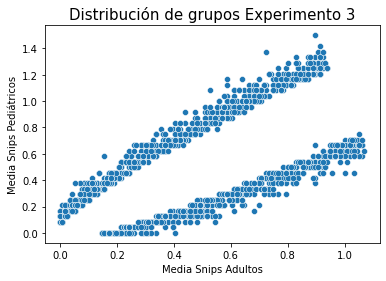

In [92]:
image = sns.scatterplot(x = e3_adult_mean,
                    y = e3_pediatric_mean,
                    sizes = (10, 5))
image.axes.set_title("Distribución de grupos Experimento 3",fontsize = 15)

plt.xlabel('Media Snips Adultos')
plt.ylabel('Media Snips Pediátricos')

# Gráfico utilizando el top 50 de caracteristicas del experimento 3 con zscore >= 2

Text(0, 0.5, 'Media Snips Pediátricos')

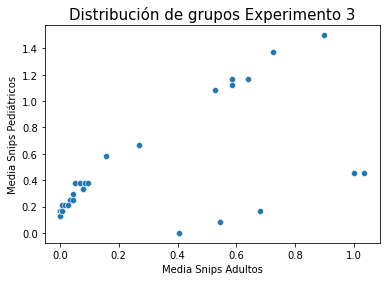

In [93]:
image = sns.scatterplot(x = e3_adult_mean_Top50,
                    y = e3_pediatric_mean_Top50,
                    sizes = (10, 5))
image.axes.set_title("Distribución de grupos Experimento 3",fontsize = 15)

plt.xlabel('Media Snips Adultos')
plt.ylabel('Media Snips Pediátricos')

# Tabla Experimento 3 

In [94]:
abs_mean = abs(e3_adult_mean - e3_pediatric_mean)#abs(e3_adult_mean_Top50 - e3_pediatric_mean_Top50)#abs(df_Test_Top50_3[df_Test_Top50_3['Category']=='ADULT'].mean() - df_Test_Top50_3[df_Test_Top50_3['Category']=='PEDIATRIC'].mean()).tolist()
abs_mean = pd.Series(abs_mean)
e3_adult_mean_s = pd.Series(e3_adult_mean)# pd.Series(e3_adult_mean_Top50)
e3_pediatric_mean_s = pd.Series(e3_adult_mean)# pd.Series(e3_pediatric_mean_Top50)

df3_zscore_cp = df3_zscore#.nlargest(50, 'Score').copy()

df3_zscore_cp.reset_index(drop=True, inplace=True)
abs_mean.reset_index(drop=True, inplace=True)
e3_adult_mean_s.reset_index(drop=True, inplace=True)
e3_pediatric_mean_s.reset_index(drop=True, inplace=True)

df3_zscore_cp =  pd.concat([df3_zscore_cp, e3_adult_mean_s, e3_pediatric_mean_s, abs_mean], axis=1)
df3_zscore_cp.rename(columns={2: 'Abs(media adultos - media pediátricos)', 0: 'Media adultos', 1 : 'Media pediátricos'}, inplace=True)
df3_zscore_cp.sort_values(by='Abs(media adultos - media pediátricos)', axis=0, ascending=False).to_csv('df3_zscore_filter_all_features.csv')

In [95]:
# Graficaremos PCA con 3 componentes

X = X_imp_exp3_reduced_F

pca = PCA(n_components=3) #n_components=125 140 explica el 100% de la varianza
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y3,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [96]:
len(pca.components_)

3

# Gráfico utilizando todas las caracteristicas del experimento 4 con zscore >= 2 y para la que no fueron eliminadas columnas con valores repetidos.

(140, 129831)
[0.20571429 0.1450113  0.20571429 ... 0.20571429 0.20571429 0.20571429]
[False False False ... False False False]
(129831,)
---------------------------------------------------------------------------------------------------------
10951
(140, 10951)
---------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Text(0, 0.5, 'Media Snips Pediátricos')

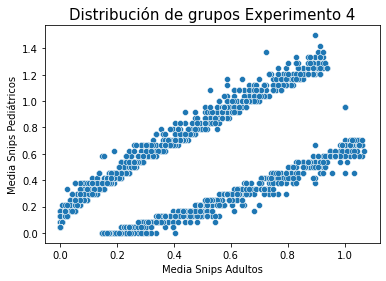

In [97]:
df3 = df.copy()
df3.drop('Sample', axis=1, inplace=True)

# Separamos las características ("X") de la clase a predecir ("y")

X3 = df3.drop('Category', axis=1)
y3 = df3['Category']

# No se puede hacer selección de características si hay valores nulos
# Imputamos el valor más frecuente (sustituimos los NAN por el valor más frecuente de la columna)

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_imp_exp3 = pd.DataFrame(imp.fit_transform(X3))
X_imp_exp3_cp = X_imp_exp3.copy() # se cre una copia de la imputación de los valores para poder aplicar MI y verificar el score de los modelos
X_imp_exp3.columns = X3.columns
X_imp_exp3_cp.columns = X3.columns

F3, pval3 = FC(X_imp_exp3_cp, y3)
print(X_imp_exp3_cp.shape)
print(F3)
print(pval3 <= 0.05)



zscoreF3 = stats.zscore(F3)

print(zscoreF3.shape)


print('---------------------------------------------------------------------------------------------------------')
_range = (zscoreF3 >= 2)
print(len(zscoreF3[_range]))
print(X_imp_exp3_cp.loc[:,_range].shape)

X_imp_exp3_reduced_F = X_imp_exp3_cp.loc[:,_range].copy()

print('---------------------------------------------------------------------------------------------------------')


df_Test3 = X_imp_exp3_reduced_F.copy()
df_Test3 = pd.concat((df_Test3,y3),axis=1)


e3_adult_mean = df_Test3[df_Test3['Category']=='ADULT'].mean()
e3_pediatric_mean = df_Test3[df_Test3['Category']=='PEDIATRIC'].mean()

image = sns.scatterplot(x = e3_adult_mean,
                    y = e3_pediatric_mean,
                    sizes = (10, 5))
image.axes.set_title("Distribución de grupos Experimento 4",fontsize = 15)

plt.xlabel('Media Snips Adultos')
plt.ylabel('Media Snips Pediátricos')

# Gráfico utilizando el top 50 de caracteristicas del experimento 4 con zscore >= 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Text(0, 0.5, 'Media Snips Pediátricos')

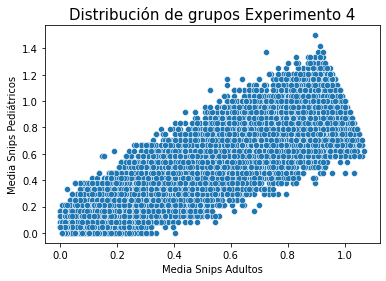

In [98]:
df3_score = pd.DataFrame(zscoreF3)
df3_columns = pd.DataFrame(X_imp_exp3_cp.columns)
df3_zscore = pd.concat([df3_columns, df3_score], axis=1)
df3_zscore.columns = ['Feature', 'Score']
df3_zscore.nlargest(50, 'Score')['Feature'].tolist()

df_Test_Top50_3 = X_imp_exp3#[df3_zscore.nlargest(50, 'Score')['Feature'].tolist()]

df_Test_Top50_3 = pd.concat((df_Test_Top50_3,y3),axis=1)

e3_adult_mean_Top50 = df_Test_Top50_3[df_Test_Top50_3['Category']=='ADULT'].mean()
e3_pediatric_mean_Top50 = df_Test_Top50_3[df_Test_Top50_3['Category']=='PEDIATRIC'].mean()

image = sns.scatterplot(x = e3_adult_mean_Top50,
                    y = e3_pediatric_mean_Top50,
                    sizes = (10, 5))
image.axes.set_title("Distribución de grupos Experimento 4",fontsize = 15)

plt.xlabel('Media Snips Adultos')
plt.ylabel('Media Snips Pediátricos')

In [99]:
# Graficaremos PCA con 3 componentes

X = X_imp_exp3_reduced_F

pca = PCA() #n_components=125 140 explica el 100% de la varianza
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y3,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# Tabla Experimento 4

In [100]:
abs_mean = abs(e3_adult_mean_Top50 - e3_pediatric_mean_Top50)#abs(df_Test_Top50_3[df_Test_Top50_3['Category']=='ADULT'].mean() - df_Test_Top50_3[df_Test_Top50_3['Category']=='PEDIATRIC'].mean()).tolist()
abs_mean = pd.Series(abs_mean)
e3_adult_mean_s = pd.Series(e3_adult_mean_Top50)
e3_pediatric_mean_s = pd.Series(e3_pediatric_mean_Top50)

df3_zscore_cp = df3_zscore#.nlargest(50, 'Score').copy()

df3_zscore_cp.reset_index(drop=True, inplace=True)
abs_mean.reset_index(drop=True, inplace=True)
e3_adult_mean_s.reset_index(drop=True, inplace=True)
e3_pediatric_mean_s.reset_index(drop=True, inplace=True)

df3_zscore_cp =  pd.concat([df3_zscore_cp, e3_adult_mean_s, e3_pediatric_mean_s, abs_mean], axis=1)
df3_zscore_cp.rename(columns={2: 'Abs(media adultos - media pediátricos)', 0: 'Media adultos', 1 : 'Media pediátricos'}, inplace=True)
df3_zscore_cp.sort_values(by='Abs(media adultos - media pediátricos)', axis=0, ascending=False).to_csv('df4_zscore_filter_all_features.csv')

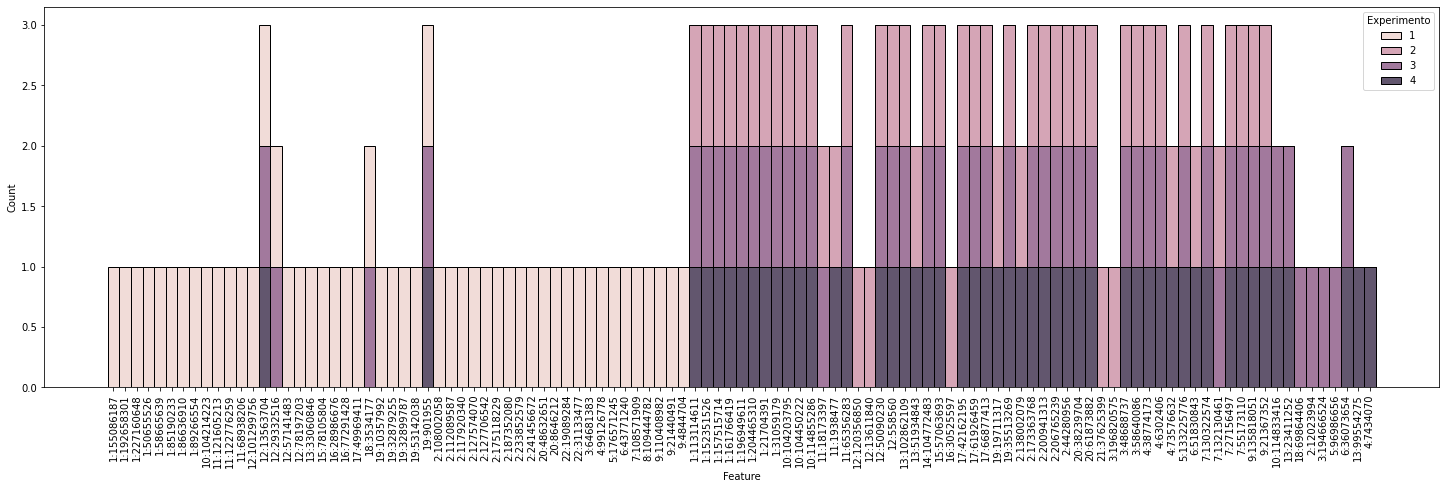

In [101]:
dfTop50FormatedNew['Feature'].value_counts() > 1

plt.figure(figsize=(25, 7))
sns.histplot(x='Feature', 
             data=dfTop50FormatedNew, 
             hue='Experimento', 
             multiple='stack') # multiple='stack'
plt.xticks(rotation=90)
plt.show()

#, bins=[x for x in range(1980,2020)]

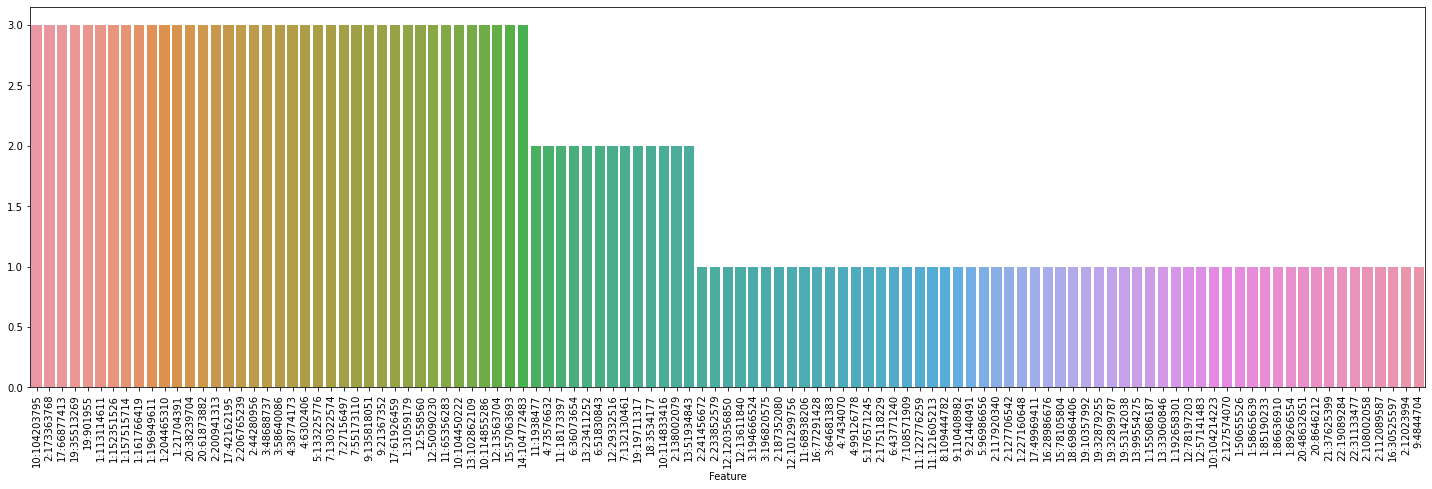

In [102]:
features_count = dfTop50FormatedNew.groupby(by=['Feature'])['Feature'].count().sort_values(ascending=False)

plt.figure(figsize=(25, 7))
sns.barplot(x=features_count.index, y=features_count.values)
plt.xticks(rotation=90)
plt.show()

In [103]:
print(X_imp_exp1_reduced_F.shape)
print(X_imp_exp2_reduced_F.shape)
print(X_imp_exp3_reduced_F.shape)

# preparamos la columnas de Categoría para que Adultos = 1, Pediátricos = 0
y = y1

y = y.replace('ADULT',1)
y = y.replace('PEDIATRIC',0)
y

(140, 985)
(140, 2907)
(140, 10951)


0      0
1      0
2      0
3      1
4      1
      ..
135    1
136    1
137    1
138    1
139    1
Name: Category, Length: 140, dtype: int64

# Elaboramos el arbol de decisión para los snps del experimento 1

In [104]:
X.head()

,1:925881,1:935677,1:957189,1:959139,1:1022409,1:1085966,1:1184163,1:1313934,1:1390620,1:1480974,...,22:50289916,22:50438050,22:50440020,22:50447252,22:50462251,22:50505863,22:50523779,22:50576781,22:50626801,22:50769542
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


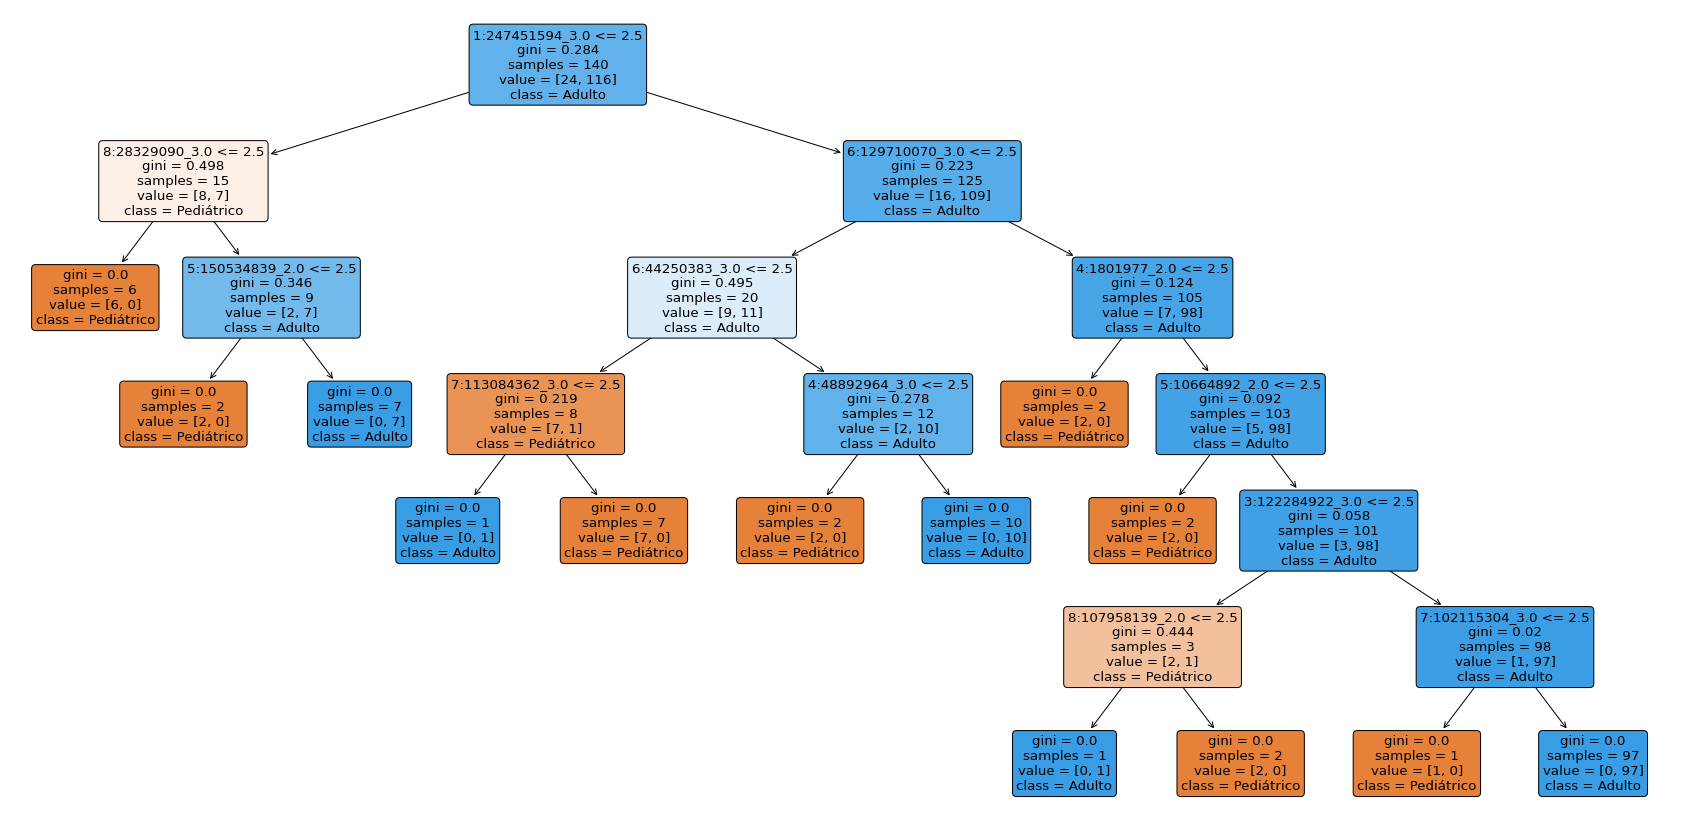

In [105]:
X = X_imp_exp1_reduced_F
y = y1

y = y.replace('ADULT',1)
y = y.replace('PEDIATRIC',0)

# Hacemos on Hot Encoding ya que las columnas toman valores discretos dependiendo del experimento
X_encoded = pd.get_dummies(X, columns = X.columns)
X_encoded.head()

#X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

clf = DecisionTreeClassifier(random_state = 42) #DecisionTreeRegressor() #DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
#clf.fit(X_train, y_train)
clf.fit(X, y)

plt.figure(figsize=(30,15))
tree.plot_tree(clf, 
               filled = True,
               rounded = True,
               class_names = ['Pediátrico', 'Adulto'],
               feature_names = X_encoded.columns
              )
plt.show()

In [106]:
from sklearn import metrics

y_pred = clf.predict(X)

print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 1.0


Cross Validation - kfold

De una forma sencilla y cogemos k=10

In [107]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score

kf10 = KFold(n_splits=10, shuffle=False)


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [109]:
scores = cross_val_score(clf, X_train, y_train, cv=kf10, scoring="accuracy")
 
print("Metricas cross_validation", scores)

Metricas cross_validation [0.84615385 0.76923077 0.84615385 0.76923077 0.76923077 0.69230769
 0.58333333 0.66666667 0.58333333 0.83333333]


In [110]:
scores.mean()

0.7358974358974358

In [111]:
print('\n'.join(map(str, scores)))

0.8461538461538461
0.7692307692307693
0.8461538461538461
0.7692307692307693
0.7692307692307693
0.6923076923076923
0.5833333333333334
0.6666666666666666
0.5833333333333334
0.8333333333333334


In [112]:
scores.sort()
scores

array([0.58333333, 0.58333333, 0.66666667, 0.69230769, 0.76923077,
       0.76923077, 0.76923077, 0.83333333, 0.84615385, 0.84615385])

In [113]:
X_train_1.shape

(105, 129831)

In [135]:
X.shape

(140, 10951)

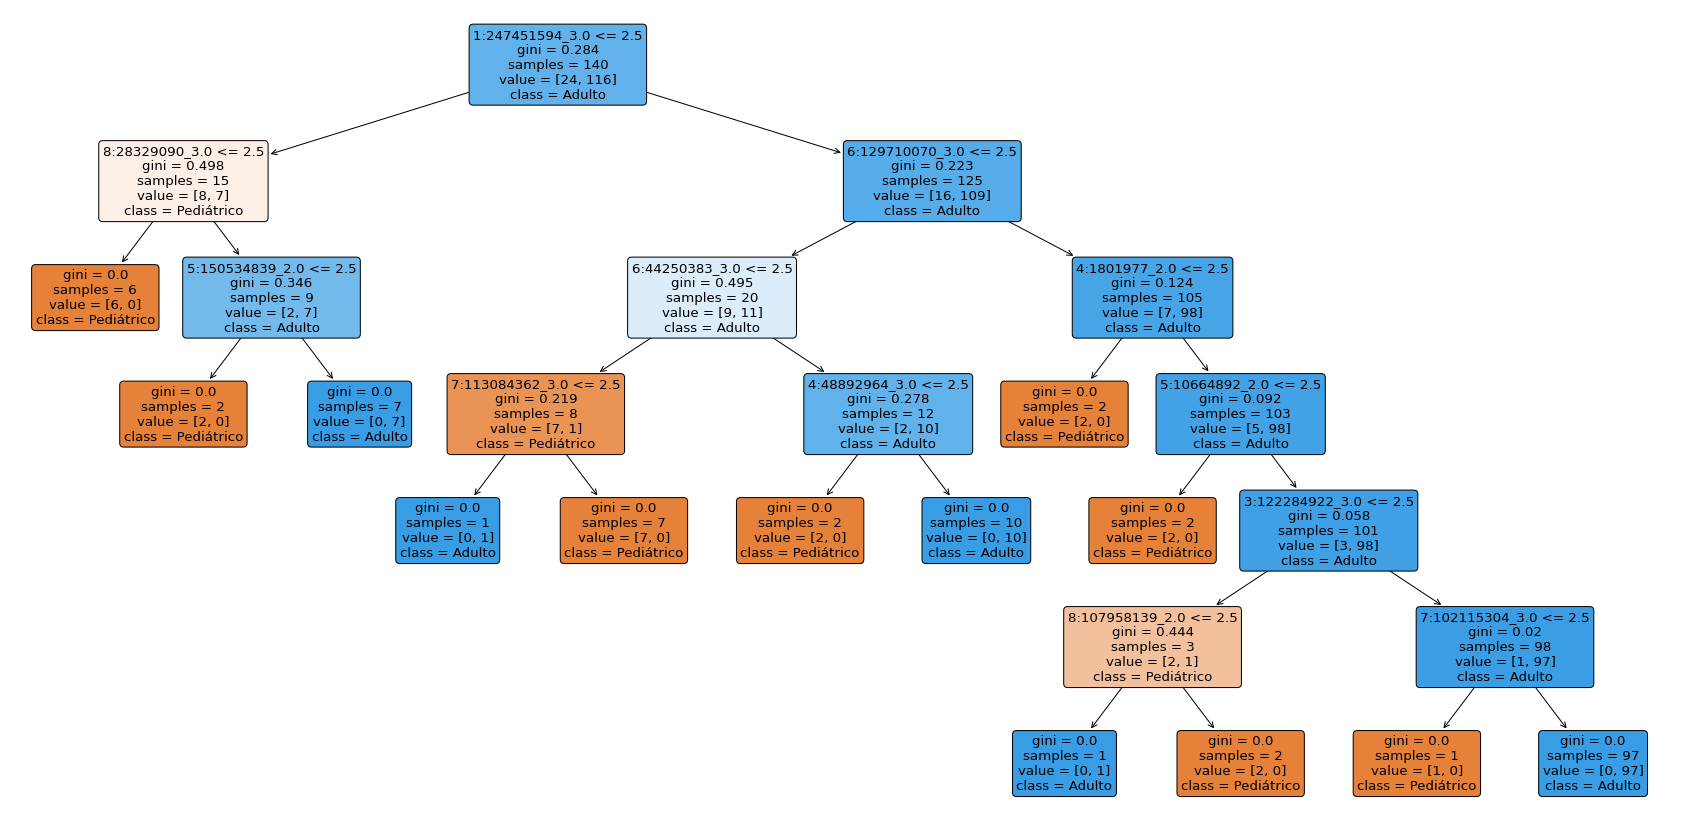

In [115]:
X = X_imp_exp1_reduced_F
y = y1

y = y.replace('ADULT',1)
y = y.replace('PEDIATRIC',0)

# Hacemos on Hot Encoding ya que las columnas toman valores discretos dependiendo del experimento
X_encoded = pd.get_dummies(X, columns = X.columns)
X_encoded.head()

#X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

clf = DecisionTreeClassifier(random_state = 42) #DecisionTreeRegressor() #DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X, y)

plt.figure(figsize=(30,15))
tree.plot_tree(clf, 
               filled = True,
               rounded = True,
               class_names = ['Pediátrico', 'Adulto'],
               feature_names = X_encoded.columns
              )
plt.show()

# Elaboramos el arbol de decisión para los snps del experimento 2

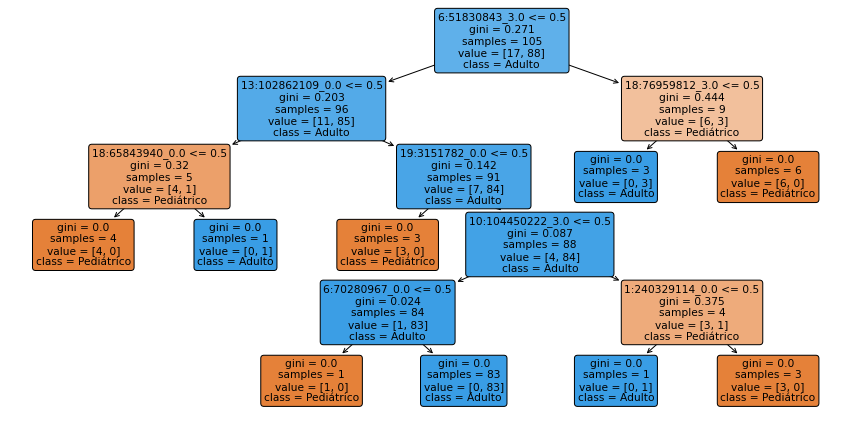

In [116]:
X = X_imp_exp2_reduced_F
y = y1

y = y.replace('ADULT',1)
y = y.replace('PEDIATRIC',0)

# Hacemos on Hot Encoding ya que las columnas toman valores discretos dependiendo del experimento
X_encoded = pd.get_dummies(X, columns = X.columns)
X_encoded.head()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf = DecisionTreeClassifier(random_state = 42) #DecisionTreeRegressor() #DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

plt.figure(figsize=(15,7.5))
tree.plot_tree(clf, 
               filled = True,
               rounded = True,
               class_names = ['Pediátrico', 'Adulto'],
               feature_names = X_encoded.columns
              )
plt.show()

# Elaboramos el arbol de decisión para los snps del experimento 3

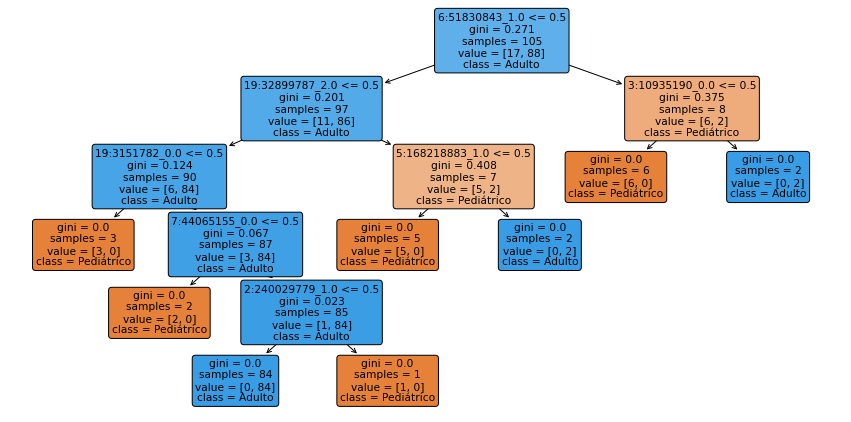

In [117]:
X = X_imp_exp3_reduced_F
y = y1

y = y.replace('ADULT',1)
y = y.replace('PEDIATRIC',0)

# Hacemos on Hot Encoding ya que las columnas toman valores discretos dependiendo del experimento
X_encoded = pd.get_dummies(X, columns = X.columns)
#print(X_encoded.head())

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf = DecisionTreeClassifier(random_state = 42) #DecisionTreeRegressor() #DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

#print(clf.classes_)
#class_names = decision_tree_classifier.classes_
#feature_names = df.columns[14:]

plt.figure(figsize=(15,7.5))
tree.plot_tree(clf, 
               filled = True,
               rounded = True,
               class_names = ['Pediátrico', 'Adulto'],
               feature_names = X_encoded.columns
              )
tree
plt.show()

Deep Learning - Keras

Experimento 1

In [118]:
#Aquí están bien los datos

X_trainDL, X_testDL, y_trainDL, y_testDL = train_test_split(X_encoded, y, random_state = 42)


In [136]:
X_trainDL, X_testDL, y_trainDL, y_testDL = train_test_split(X, y, random_state = 42)


In [119]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y_1 = encoder.fit_transform(y)
Y = pd.get_dummies(y_1).values

In [120]:
X.shape

(140, 10951)

# **Otro modelo, más sencillo de construir podría ser el siguiente:**

In [122]:
from keras.utils.vis_utils import plot_model


In [137]:
# 
print('tamaños :', X_trainDL.shape , " " , X_testDL.shape , " " , y_trainDL.shape , " " , y_testDL.shape)

tamaños : (105, 10951)   (35, 10951)   (105,)   (35,)


In [124]:
X_trainDL.shape[1]

23310

In [138]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()

#model.add(Dense(1970,input_shape=(1970,),activation='relu'))
#model.add(Dense(2, activation='relu', input_shape=(1970,)))
model.add(Dense(2,input_shape=(X_trainDL.shape[1],),activation='relu'))   # esto ya incluye una capa oculta de la red
model.add(Dense(2, activation='softmax'))

In [ ]:
#keras.backend.clear_session() 

In [ ]:
#model.compile(loss="categorical_crossentropy",
#optimizer="sgd",
#metrics = ['accuracy'])

In [128]:
#model.compile(optimizer='adam',loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])




In [139]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# e incluyo el optimizador en este punto compilando el modelo
model.compile(
    optimizer=opt,
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy', 'mae']
)

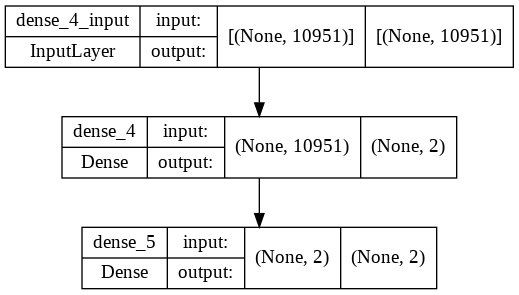

In [140]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
#X_trainDL, X_testDL, y_trainDL, y_testDL = train_test_split(X_encoded, y, random_state = 42)
X_DL=X_encoded
y_DL=y

In [ ]:
X_trainDL

In [141]:

model.fit(X_trainDL,y_trainDL,epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 6ms/step - loss: 0.6687 - accuracy: 0.6952 - mae: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.5640 - accuracy: 0.8381 - mae: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.4918 - accuracy: 0.8381 - mae: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.4312 - accuracy: 0.8381 - mae: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3831 - accuracy: 0.8381 - mae: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3430 - accuracy: 0.8381 - mae: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3070 - accuracy: 0.8381 - mae: 0.5000
Epoch 8/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2718 - accuracy: 0.8381 - mae: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2413 - accuracy: 0.8381 - mae

In [132]:
# Function to create model, required for KerasClassifier
def create_model():
  # create model
	model = Sequential()
  #model.add(Dense(2,input_shape=(X_trainDL.shape[1],),activation='relu'))   # esto ya incluye una capa oculta de la red
  #model.add(Dense(2, activation='softmax'))
  model.add(Dense(2,input_shape=(X_trainDL.shape[1],),activation='relu'))   # esto ya incluye una capa oculta de la red
  model.add(Dense(2, activation='softmax'))
  	# Compile model
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)

   # e incluyo el optimizador en este punto compilando el modelo
  model.compile(
    optimizer=opt,
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
  )
  return model

IndentationError: ignored

In [ ]:
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=1970, activation='relu'))
	model.add(Dense(2, activation='softmax'))
	# Compile model
	model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 

In [134]:
pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.2
    Uninstalling importlib-metadata-4.11.2:
      Successfully uninstalled importlib-metadata-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [133]:
#from keras.wrappers.scikit_learn import KerasClassifier
import numpy
from scikeras.wrappers import KerasClassifier


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X_DL, y_DL, cv=kfold)
print(results.mean())

ModuleNotFoundError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(X_testDL, y_testDL)
print('Test accuracy:', test_acc)


In [ ]:
scoresDL = cross_val_score(model, X_train, y_train, cv=kf10, scoring="accuracy")

In [ ]:
from tf.keras.wrappers.scikit_learn import KerasClassifier

DL_clf = KerasClassifier(build_fn=LSTM_Network, epochs=6, batch_size=64, verbose=0)


In [ ]:
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

In [ ]:
y_pred_DL = model.predict(X_test)
y_test_class_DL = np.argmax(Y_test,axis=1)
y_pred_class_DL = np.argmax(y_pred_DL,axis=1)

In [ ]:
y_pred_DL

In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testDL,y_pred_class_DL))
print(confusion_matrix(y_testDL,y_pred_class_DL))

In [ ]:
  fold_no = 1

  # Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []
  
  # Generate generalization metrics
  scores = model.evaluate(X_test, Y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

In [ ]:
scoresDL = cross_val_score(clf, X_train, y_train, cv=kf10, scoring="accuracy")


In [ ]:
scoresDL

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score

kf10 = KFold(n_splits=10, shuffle=False)


In [ ]:
scoresDL.mean()